# Sign Language real-time detection 

In [1]:
import os
import mediapipe as mp
import cv2
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils 
mp_drawing_styles = mp.solutions.drawing_styles
hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.9)

In [3]:
data_dir = 'asl_dataset'
data = []
labels = []
for i in sorted(os.listdir(data_dir)):
    if i == '.DS_Store':
        pass
    else:
        for j in os.listdir(os.path.join(data_dir,i)):
            for k in os.listdir(os.path.join(data_dir,i,j)):
                data_aux = []
                img = cv2.imread(os.path.join(data_dir,i,j,k))
                if img is None:
                    continue
                img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

                results = hands.process(img_rgb)
                if results.multi_hand_landmarks:
                    for hand_landmarks in results.multi_hand_landmarks:
                        for z in range(len(hand_landmarks.landmark)):
                            x = hand_landmarks.landmark[z].x
                            y = hand_landmarks.landmark[z].y
                            data_aux.append(x)
                            data_aux.append(y)
                    data.append(data_aux)
                    labels.append(j)
            for k in os.listdir(os.path.join(data_dir,i,j)):
                if img is None:
                    continue
# save data
f = open('data.pickle', 'wb')
pickle.dump({'data':data,'labels':labels},f)
f.close() 

c:\Users\Dell\anaconda3\envs\mp_env\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


C:\Users\Dell\AppData\Local\Temp\ipykernel_15452\2662329613.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


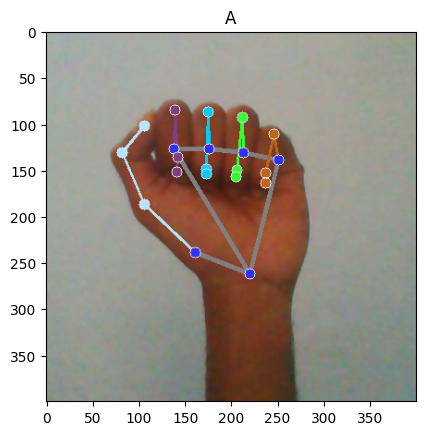

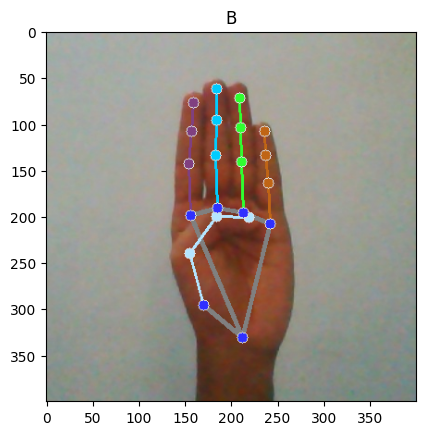

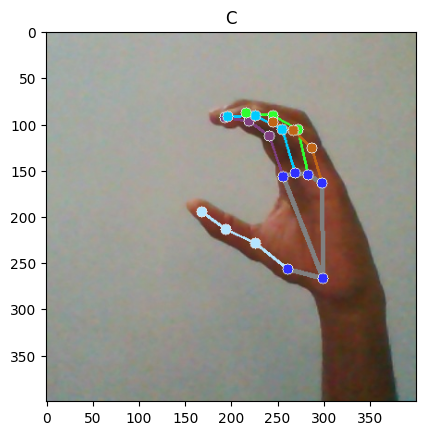

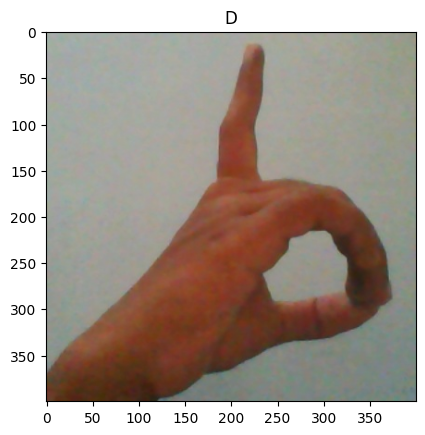

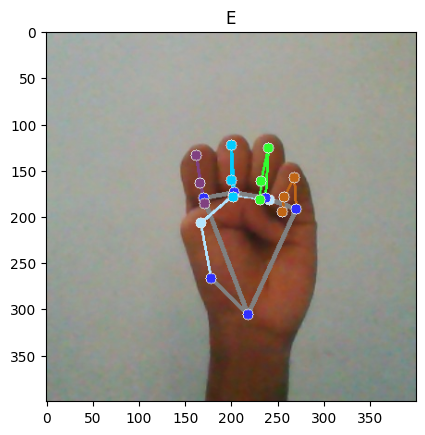

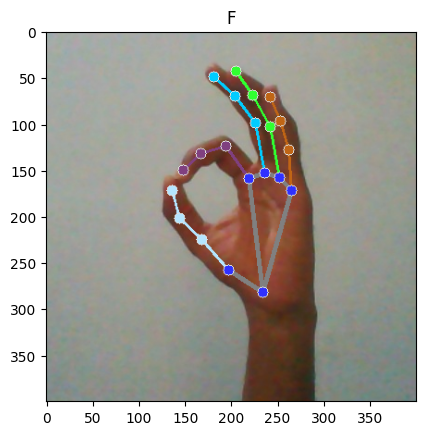

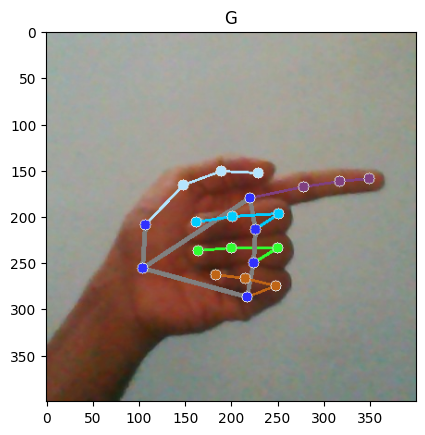

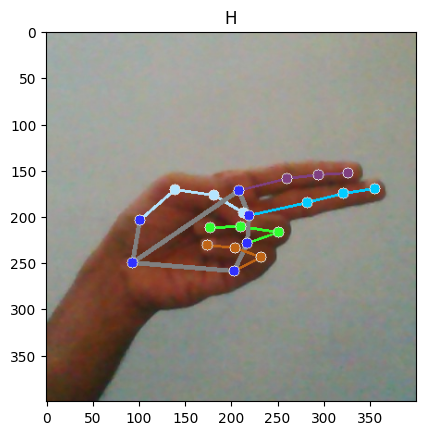

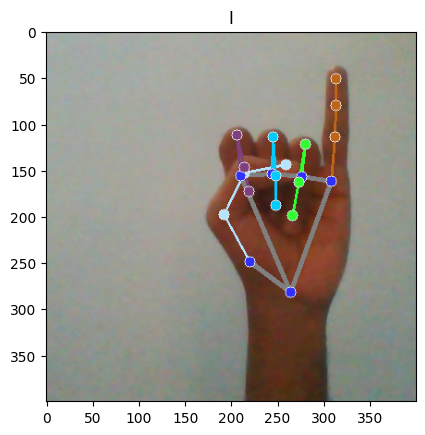

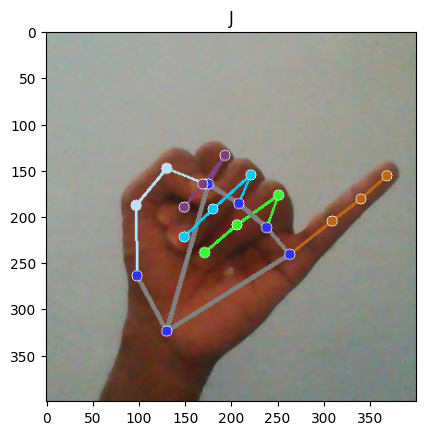

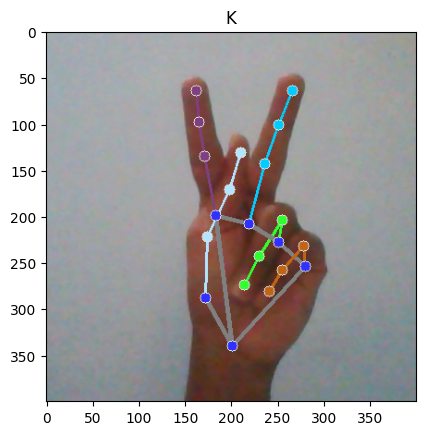

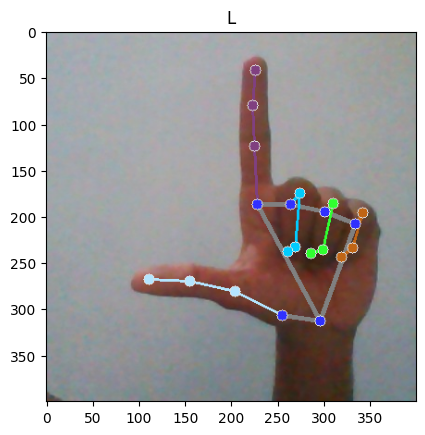

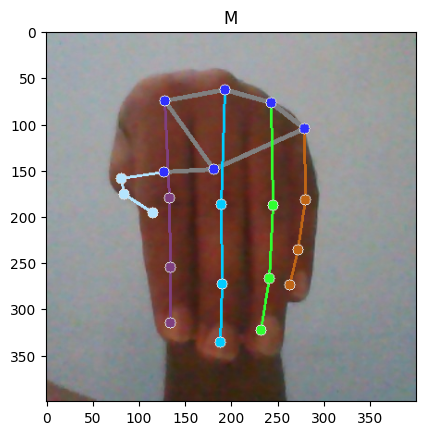

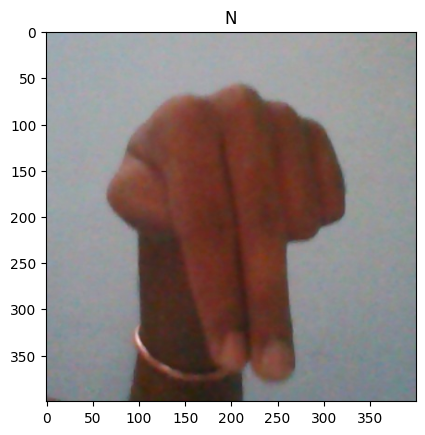

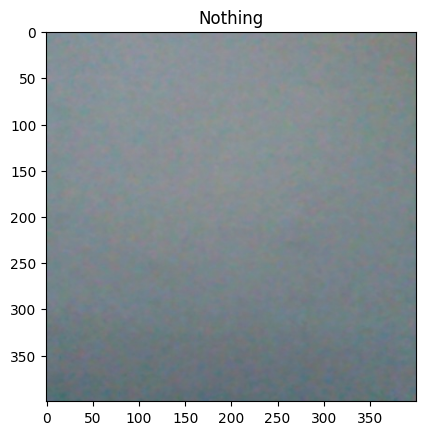

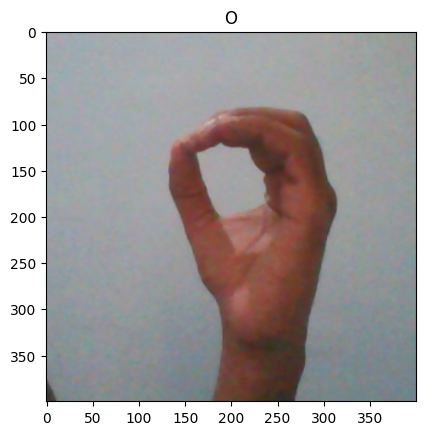

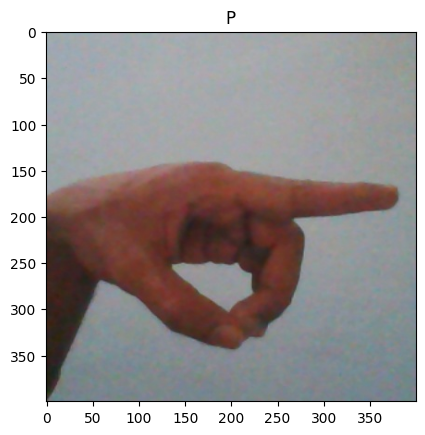

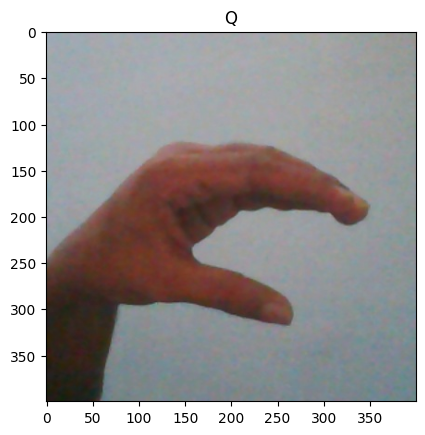

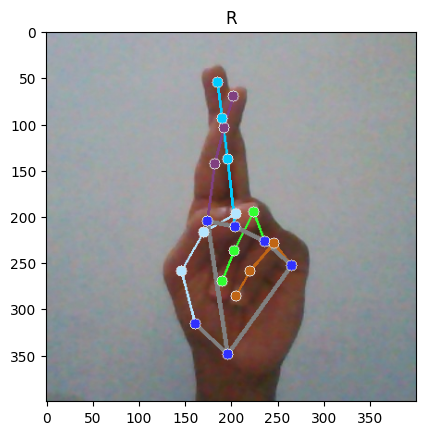

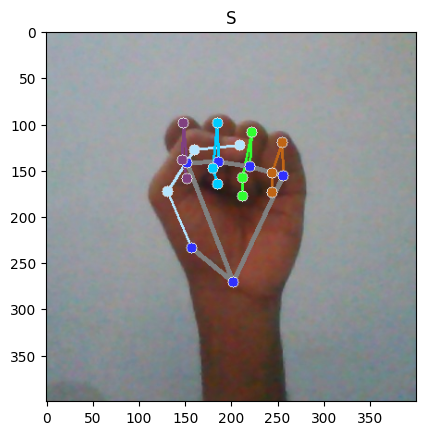

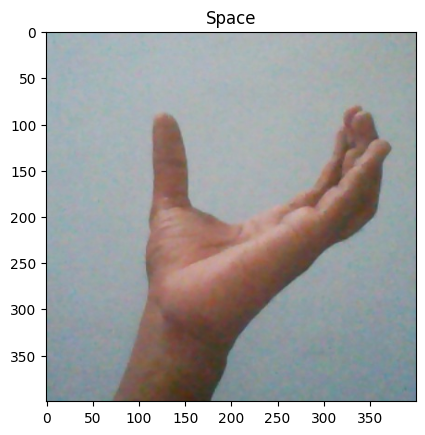

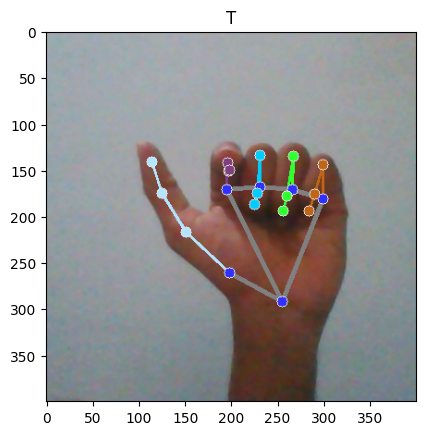

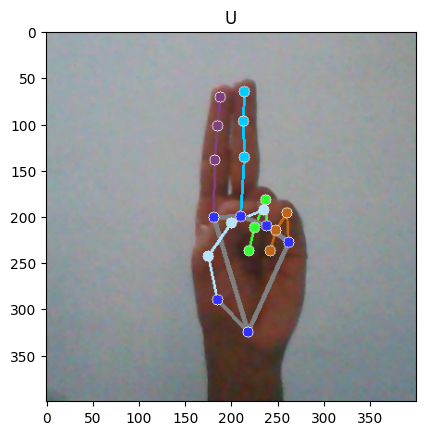

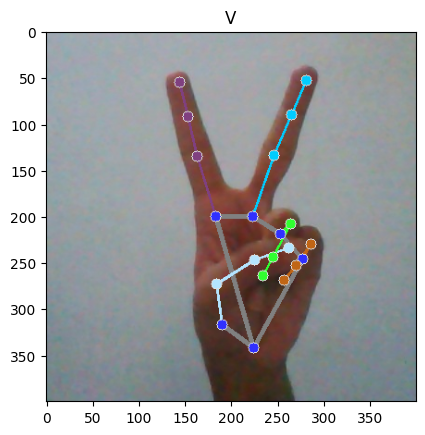

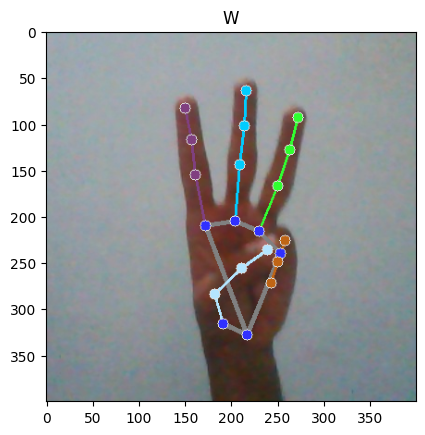

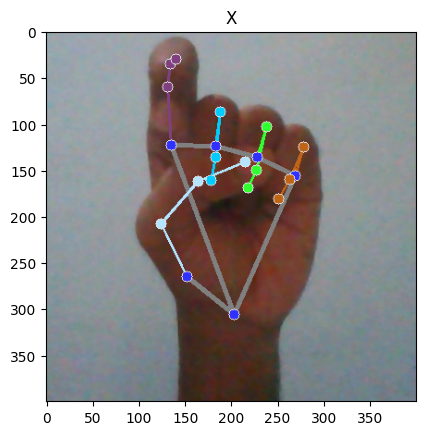

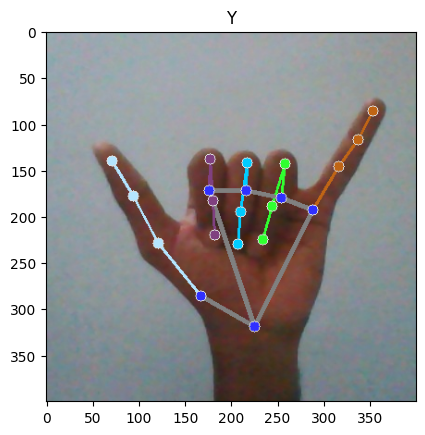

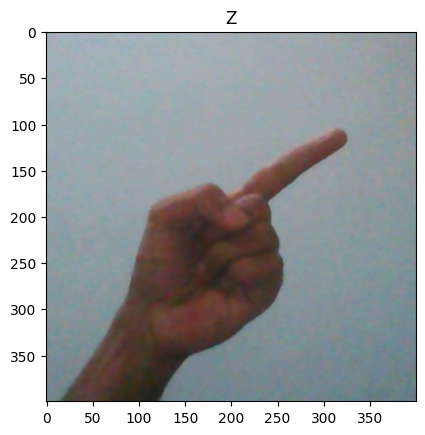

In [4]:
# visualize landmarks
data_dir = 'asl_dataset'
for i in sorted(os.listdir(data_dir)):
    if i == '.DS_Store':
        pass
    else:
        for j in os.listdir(os.path.join(data_dir,i)):
            for k in os.listdir(os.path.join(data_dir,i,j))[0:1]:
                img = cv2.imread(os.path.join(data_dir,i,j,k))
                if img is None:
                    continue
                img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

                results = hands.process(img_rgb)
                if results.multi_hand_landmarks:
                    for hand_landmarks in results.multi_hand_landmarks:
                        mp_drawing.draw_landmarks(
                            img_rgb, # img to draw
                            hand_landmarks,
                            mp_hands.HAND_CONNECTIONS,
                            mp_drawing_styles.get_default_hand_landmarks_style(),
                            mp_drawing_styles.get_default_hand_connections_style()
                        )

                
            plt.figure()
            plt.title(j)
            plt.imshow(img_rgb)
            img_rgb, # img to draw
            hand_landmarks,
            mp_hands.HAND_CONNECTIONS,
            mp_drawing_styles.get_default_hand_landmarks_style(),
            mp_drawing_styles.get_default_hand_connections_style()
            
plt.show()

# Training

In [5]:
# split data
X_train, X_test, y_train, y_test = train_test_split(np.array(data), labels, test_size=0.15, random_state=22, shuffle=True)

# model
model = RandomForestClassifier(random_state=22)
model.fit(X_train,y_train)

# predict
pred=model.predict(X_test)

# accruracy
accuracy_score(y_test,pred)

0.9230769230769231

In [6]:
# save model
f = open('model.p', 'wb')
pickle.dump({'model':model},f)
f.close() 

# Detection

In [7]:
# load model
model_dict = pickle.load(open('model.p','rb'))
model = model_dict['model']

In [8]:
cap = cv2.VideoCapture(0)

with mp_hands.Hands(min_detection_confidence=0.8, min_tracking_confidence=0.8) as hands:
    while cap.isOpened():

        data_aux=[]
        x_ = []
        y_ = []

        ret, frame = cap.read()
        H, W, _ = frame.shape

        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame_rgb = cv2.flip(frame_rgb, 1)
        frame_rgb.flags.writeable = False
        results = hands.process(frame_rgb)
        frame_rgb.flags.writeable = True 
        frame_rgb = cv2.cvtColor(frame_rgb, cv2.COLOR_RGB2BGR)
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                mp_drawing.draw_landmarks(
                    frame_rgb, # img to draw
                    hand_landmarks,
                    mp_hands.HAND_CONNECTIONS,
                    mp_drawing.DrawingSpec(color=(28, 255, 3), thickness=5, circle_radius=10),
                    mp_drawing.DrawingSpec(color=(236, 255, 3), thickness=5, circle_radius=10)
                )


            for hand_landmarks in results.multi_hand_landmarks:
                for i in range(len(hand_landmarks.landmark)):
                    x = hand_landmarks.landmark[i].x
                    y = hand_landmarks.landmark[i].y
                    data_aux.append(x)
                    data_aux.append(y)
                    x_.append(x)
                    y_.append(y)

            x1 = int(min(x_) * W)-10
            y1 = int(min(y_) * H)-10

            x2 = int(max(x_) * W)-10
            y2 = int(max(y_) * H)-10
            prediction = model.predict([np.array(data_aux)[0:42]])[0]

            cv2.rectangle(frame_rgb, (x1,y1-10), (x2,y2), (255,99,173), 6)
            cv2.putText(frame_rgb, prediction, (x1,y1), cv2.FONT_HERSHEY_DUPLEX, 5, (255,0,0), 5, cv2.LINE_AA)

        cv2.imshow('frame',frame_rgb)  
        # cv2.waitKey(1)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

c:\Users\Dell\anaconda3\envs\mp_env\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\Dell\anaconda3\envs\mp_env\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\Dell\anaconda3\envs\mp_env\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\Dell\an

KeyboardInterrupt: 